<a href="https://colab.research.google.com/github/majesticio/Housing_Prices/blob/master/Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Housing Prices
*Using Linear/Nonlinear Regression*

---
by **Gabriel Fosse**

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn import preprocessing
from sklearn.linear_model import Ridge
import statsmodels.api as sm


##Data Collection
This data was provided by CNM Ingenuity. **train & test_data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
paste_train_path_here = '/content/drive/My Drive/Colab Notebooks/csv files/Housing-Data.csv'
paste_blind_path_here = '/content/drive/My Drive/Colab Notebooks/csv files/Housing_Data_Blind_Test.csv'

train = pd.read_csv(paste_train_path_here)

test_data = pd.read_csv(paste_blind_path_here)

print(test_data.shape, train.shape)

(246, 79) (2637, 81)


Perameters

In [ ]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

##Data Cleaning

Let's have a look at our dataframe...

In [ ]:
train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,3,1964,1964,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,513.0,LwQ,144.0,348.0,1005.0,GasA,TA,Y,SBrkr,1005,0,0,1005,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1964.0,Unf,2.0,440.0,TA,TA,N,0,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1296,0,0,1296,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2.0,516.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,780.0,780.0,GasA,TA,Y,SBrkr,780,595,0,1375,0.0,0.0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,1979.0,Unf,1.0,544.0,TA,TA,P,0,162,0,0,126,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,484.0,Unf,0.0,491.0,975.0,GasA,Ex,Y,SBrkr,975,873,0,1848,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2000.0,RFn,2.0,592.0,TA,TA,Y,280,184,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,7,9,1936,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,Gd,Gd,No,ALQ,350.0,BLQ,210.0,0.0,560.0,GasA,Ex,Y,SBrkr,575,560,0,1135,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1971.0,RFn,2.0,576.0,TA,TA,Y,256,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [ ]:
train_copy = train.copy()

###Drop appropriate rows and columns

**Drop row 2001 because basement information is incomplete.**

In [ ]:
train_copy = train_copy.drop(2001,axis=0)

**Drop rows 162 and 329 because Year Garage Built information is inconsistent.**

In [ ]:
train_copy = train_copy.drop(162,axis=0)
train_copy = train_copy.drop(329,axis=0)

**Drop row 1555 because it is the only instance with a tennis court ('TenC')** 

In [ ]:
train_copy = train_copy.drop(1555,axis=0)

**Remove 'PID' feature.**

In [ ]:
train_copy.drop('PID',axis=1,inplace=True)

**Drop 'Garage Area'**

We will drop 'Garage Area' and see if it improves the prediction, supposing that it is over correlated to 'Garage Cars' and the amount of cars the garage holds is more important than how big it is.

In [ ]:
train_copy.drop('Garage Area',axis=1,inplace=True)

###Dealing with NaNs

**First let's fill null values with appropriate substitutions...**

In [ ]:
train_copy['Lot Frontage'] = train_copy['Lot Frontage'].fillna(0.0)

In [ ]:
train_copy['Alley'] = train_copy['Alley'].fillna('No Alley')

In [ ]:
train_copy['Mas Vnr Type'] = train_copy['Mas Vnr Type'].fillna('None')

In [ ]:
train_copy['Mas Vnr Area'] = train_copy['Mas Vnr Area'].fillna(0.0)

In [ ]:
train_bsmt_null = train_copy[train_copy['BsmtFin Type 2'].isnull()].copy()

In [ ]:
train_copy['Bsmt Qual'] = train_copy['Bsmt Qual'].fillna('No Basement')

In [ ]:
train_copy['Bsmt Cond'] = train_copy['Bsmt Cond'].fillna('No Basement')

In [ ]:
train_copy['Bsmt Exposure'] = train_copy['Bsmt Exposure'].fillna('No Basement')

In [ ]:
train_copy['BsmtFin Type 1'] = train_copy['BsmtFin Type 1'].fillna('No Basement')

In [ ]:
train_copy['BsmtFin Type 2'] = train_copy['BsmtFin Type 2'].fillna('No Basement')

In [ ]:
train_copy['BsmtFin SF 1'] = train_copy['BsmtFin SF 1'].fillna(0.0)

In [ ]:
train_copy['BsmtFin SF 2'] = train_copy['BsmtFin SF 2'].fillna(0.0)

In [ ]:
train_bsmt_null = train_copy[train_copy['Bsmt Unf SF'].isnull()].copy()

In [ ]:
train_copy['Bsmt Unf SF'] = train_copy['Bsmt Unf SF'].fillna(0.0)

In [ ]:
train_copy['Total Bsmt SF'] = train_copy['Total Bsmt SF'].fillna(0.0)

In [ ]:
train_copy['Bsmt Full Bath'] = train_copy['Bsmt Full Bath'].fillna(0.0)

In [ ]:
train_copy['Bsmt Half Bath'] = train_copy['Bsmt Half Bath'].fillna(0.0)

In [ ]:
train_copy['Fireplace Qu'] = train_copy['Fireplace Qu'].fillna('No Fireplace')

In [ ]:
train_copy['Garage Type'] = train_copy['Garage Type'].fillna('No Garage')

In [ ]:
train_copy['Garage Yr Blt'].fillna(train_copy['Year Built'], inplace=True)

In [ ]:
train_copy['Garage Finish'] = train_copy['Garage Finish'].fillna('No Garage')

In [ ]:
train_copy['Garage Qual'] = train_copy['Garage Qual'].fillna('No Garage')

In [ ]:
train_copy['Garage Cond'] = train_copy['Garage Cond'].fillna('No Garage')

In [ ]:
train_copy['Pool QC'] = train_copy['Pool QC'].fillna('No Pool')

In [ ]:
train_copy['Fence'] = train_copy['Fence'].fillna('No Fence')

In [ ]:
train_copy['Misc Feature'] = train_copy['Misc Feature'].fillna('No Misc Features')

In [ ]:
train_copy.isna().sum().sum()

0

###The devil is in the details...

**Note that feature 'MS Subclass' is actually a categorical feature. Change numerical values to 'String' values.**

In [ ]:
train_copy['MS SubClass'] = train_copy['MS SubClass'].apply(str)

In [ ]:
train_copy['Full Bath'] = train_copy['Full Bath'].apply(str)

In [ ]:
train_copy['Half Bath'] = train_copy['Half Bath'].apply(str)

**Found outliers due to NON "Normal" data instances. Removing all NON "Normal" data instances.**



In [ ]:
train_copy = train_copy[train_copy['Sale Condition']=='Normal']

###Cleaned Data

**Let's make a new variable for the cleaned dataset.**

In [ ]:
train_clean = train_copy.copy()

**All NaNs have been removed.**

In [ ]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2636
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2163 non-null   object 
 1   MS Zoning        2163 non-null   object 
 2   Lot Frontage     2163 non-null   float64
 3   Lot Area         2163 non-null   int64  
 4   Street           2163 non-null   object 
 5   Alley            2163 non-null   object 
 6   Lot Shape        2163 non-null   object 
 7   Land Contour     2163 non-null   object 
 8   Utilities        2163 non-null   object 
 9   Lot Config       2163 non-null   object 
 10  Land Slope       2163 non-null   object 
 11  Neighborhood     2163 non-null   object 
 12  Condition 1      2163 non-null   object 
 13  Condition 2      2163 non-null   object 
 14  Bldg Type        2163 non-null   object 
 15  House Style      2163 non-null   object 
 16  Overall Qual     2163 non-null   int64  
 17  Overall Cond  

**Re-index the dataframe.**

In [ ]:
train_clean = train_clean.reset_index(drop=True)

##Exploratory Data Analysis

**Make a new dataframe with just the numeric features. We will do some analysis before adding features with categorical values (using onehot encoding).**

In [ ]:
train_numeric = train_clean.select_dtypes(include=['int64','float64'])

In [ ]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2163 non-null   float64
 1   Lot Area         2163 non-null   int64  
 2   Overall Qual     2163 non-null   int64  
 3   Overall Cond     2163 non-null   int64  
 4   Year Built       2163 non-null   int64  
 5   Year Remod/Add   2163 non-null   int64  
 6   Mas Vnr Area     2163 non-null   float64
 7   BsmtFin SF 1     2163 non-null   float64
 8   BsmtFin SF 2     2163 non-null   float64
 9   Bsmt Unf SF      2163 non-null   float64
 10  Total Bsmt SF    2163 non-null   float64
 11  1st Flr SF       2163 non-null   int64  
 12  2nd Flr SF       2163 non-null   int64  
 13  Low Qual Fin SF  2163 non-null   int64  
 14  Gr Liv Area      2163 non-null   int64  
 15  Bsmt Full Bath   2163 non-null   float64
 16  Bsmt Half Bath   2163 non-null   float64
 17  Bedroom AbvGr 

**Create a variable that shows correlations to the sales price.**

In [ ]:
train_numeric_corr = train_numeric.corr()['SalePrice']

In [ ]:
type(train_numeric_corr)

pandas.core.series.Series

Check out some of the correlations with the heat map...

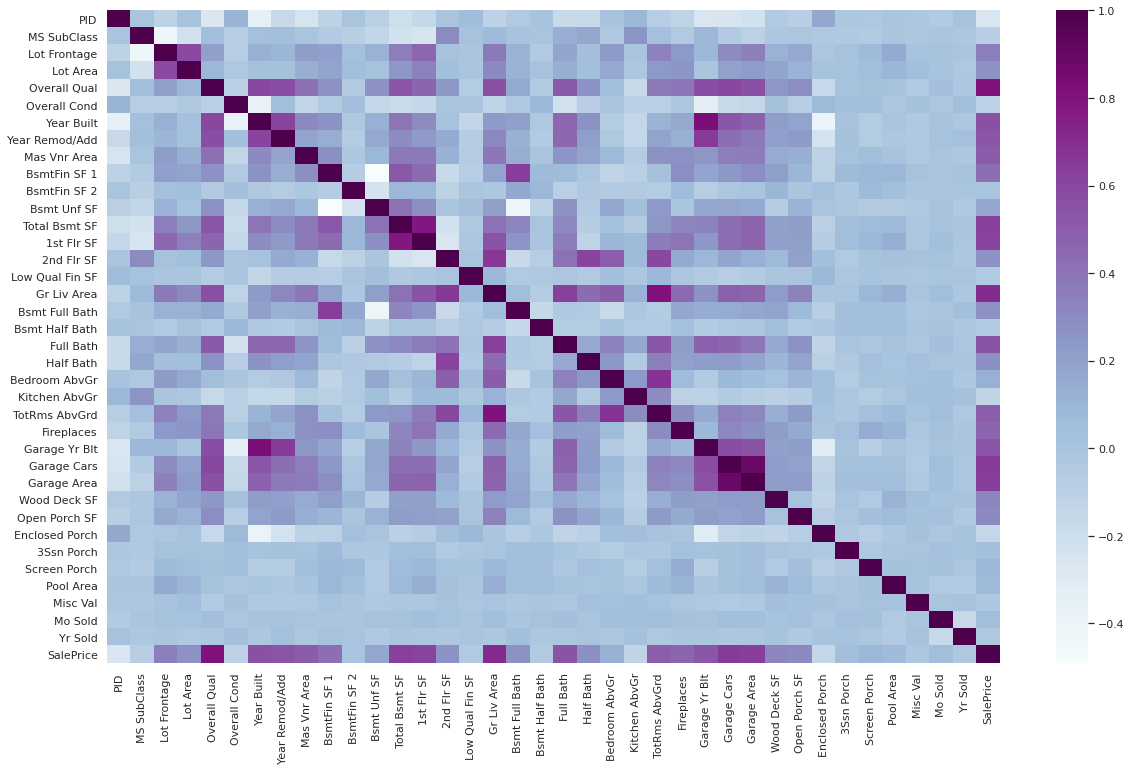

In [ ]:
sns.set()
plt.figure(figsize=(20,12))

sns.heatmap(train.corr(), cmap='BuPu', annot=False);

**Make a 'golden features list' that has the absolute values of the correlations from highest to lowest, the drop the sales price column because we don't care that it's correlated to itself.**

###Golden Features List 
**numeric values with high correlation**

In [ ]:
golden_features_list = train_numeric_corr.abs().sort_values(ascending=False)
golden_features_list = golden_features_list.drop('SalePrice',axis=0)
golden_features_list

Overall Qual       0.792308
Gr Liv Area        0.727615
Total Bsmt SF      0.634258
Garage Cars        0.629427
1st Flr SF         0.621814
Year Built         0.534684
Garage Yr Blt      0.522143
Year Remod/Add     0.509164
TotRms AbvGrd      0.493734
Fireplaces         0.489028
Mas Vnr Area       0.483410
BsmtFin SF 1       0.447559
Wood Deck SF       0.340276
Open Porch SF      0.335349
Bsmt Full Bath     0.291814
2nd Flr SF         0.287584
Lot Area           0.283183
Bedroom AbvGr      0.167979
Lot Frontage       0.159410
Bsmt Unf SF        0.147995
Enclosed Porch     0.127245
Kitchen AbvGr      0.116725
Screen Porch       0.110002
Overall Cond       0.086368
Bsmt Half Bath     0.041968
BsmtFin SF 2       0.039816
Pool Area          0.029270
Yr Sold            0.025596
Low Qual Fin SF    0.021957
Misc Val           0.019277
3Ssn Porch         0.018903
Mo Sold            0.009089
Name: SalePrice, dtype: float64

In [ ]:
golden_features_list.shape

(32,)

In [ ]:
golden_features_list.index[:4]

Index(['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars'], dtype='object')

In [ ]:
#assign sales price as variable 'outcomes'
outcomes = train_numeric['SalePrice']

###Trying out different models

**Regression with one numerical feature (top correlation).**

In [ ]:
#created a dataframe with one feature from goldenf features list
train_numeric_one_feature = pd.DataFrame(train_numeric[golden_features_list.index[:1]].copy())
#add a '1' for the y intercept
train_numeric_one_feature['Ones'] = 1
train_numeric_one_feature

,Overall Qual,Ones
0,4,1
1,4,1
2,6,1
3,8,1
4,7,1
...,...,...
2158,6,1
2159,7,1
2160,8,1
2161,6,1


Create a OLS (ordinary least squares) model with sm (statsmodels.api)

In [ ]:
#fit the model
model_one_feature = sm.OLS(outcomes,train_numeric_one_feature).fit()
#Store prediction in this variable
predictions_one_feature = model_one_feature.predict(train_numeric_one_feature)

model_one_feature.summary()
#Check the R-squared value for a good fit...

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     3644.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:47:55   Log-Likelihood:                -26126.
No. Observations:                2163   AIC:                         5.226e+04
Df Residuals:                    2161   BIC:                         5.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Overall Qual  4.129e+04    684.047     60.368      0.000       4e+04    4.26e+04
Ones         -7.329e+04   4214.646    -17.390      0.000   -8.16e+04    -6.5e+04
==============================================================================
Omnibus:                      608.458   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3124.181
Skew:                           1.236   Prob(JB):                         0.00
Kurtosis:                       8.343   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(Above) has an R-squared value of 0.628... not great

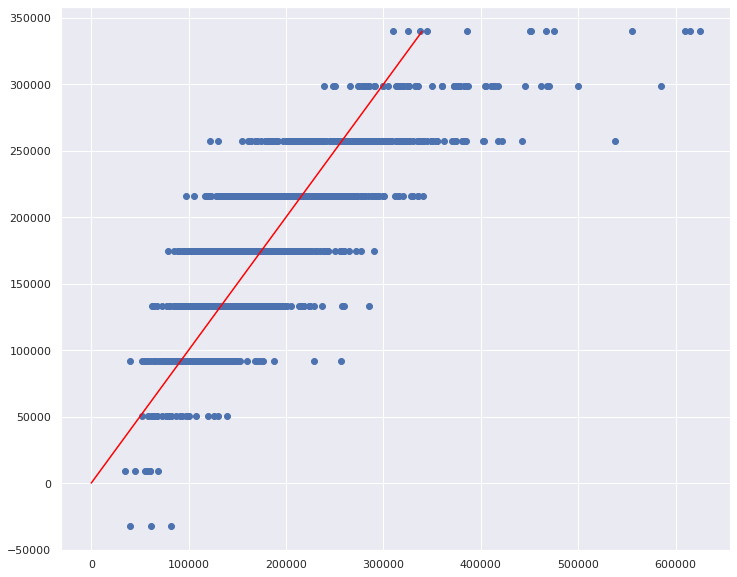

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(outcomes,predictions_one_feature)
plt.plot([0, max(predictions_one_feature)],[0, max(predictions_one_feature)], c='red');

We can see that the result(above) is... okay - kind of choppy. 


**Let's add another feature. Create a new dataframe with two features...**

In [ ]:
train_numeric_two_features = pd.DataFrame(train_numeric[golden_features_list.index[:2]].copy())

#adding our '1's again...
train_numeric_two_features['Ones'] = 1

train_numeric_two_features

,Overall Qual,Gr Liv Area,Ones
0,4,1005,1
1,4,1296,1
2,6,1375,1
3,8,1848,1
4,7,1135,1
...,...,...,...
2158,6,1176,1
2159,7,1061,1
2160,8,1226,1
2161,6,1350,1


**Create the model with two features and check the fit...**

In [ ]:
model_two_features = sm.OLS(outcomes,train_numeric_two_features).fit()
predictions_two_features = model_two_features.predict(train_numeric_two_features)
model_two_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     3269.
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:47:56   Log-Likelihood:                -25688.
No. Observations:                2163   AIC:                         5.138e+04
Df Residuals:                    2160   BIC:                         5.140e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Overall Qual  2.933e+04    667.085     43.971      0.000     2.8e+04    3.06e+04
Gr Liv Area     61.5913      1.876     32.834      0.000      57.913      65.270
Ones         -9.222e+04   3490.988    -26.417      0.000   -9.91e+04   -8.54e+04
==============================================================================
Omnibus:                      523.261   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3307.141
Skew:                           0.985   Prob(JB):                         0.00
Kurtosis:                       8.729   Cond. No.                     7.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(above) R-squared value has increased a bit, but still not impressive

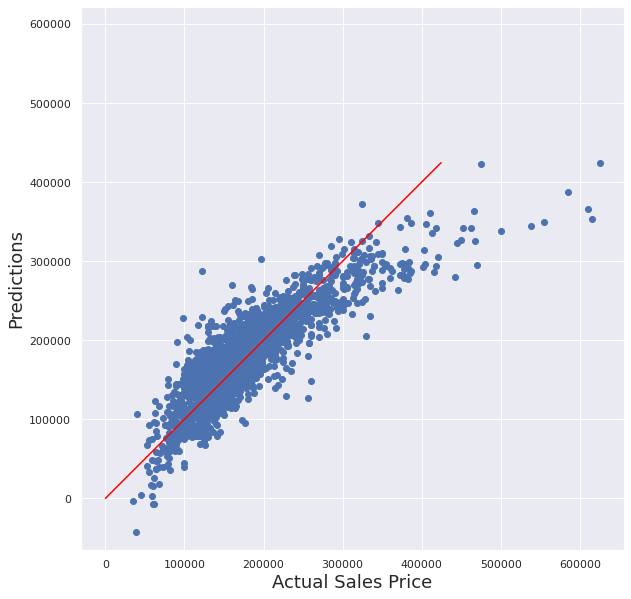

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(outcomes,predictions_two_features)
plt.plot([0, max(predictions_two_features)],[0, max(predictions_two_features)], c='red');

plt.xlabel('Actual Sales Price',fontsize=18);
plt.ylabel('Predictions',fontsize=18);

plt.axis('equal');
plt.axis('square');

(Above) We can see it's starting to line up, but there are some outliers and nonlinear patterns.

###Observing change in R-squared

**Let's investigate the change in R-squared values when adding new features...**

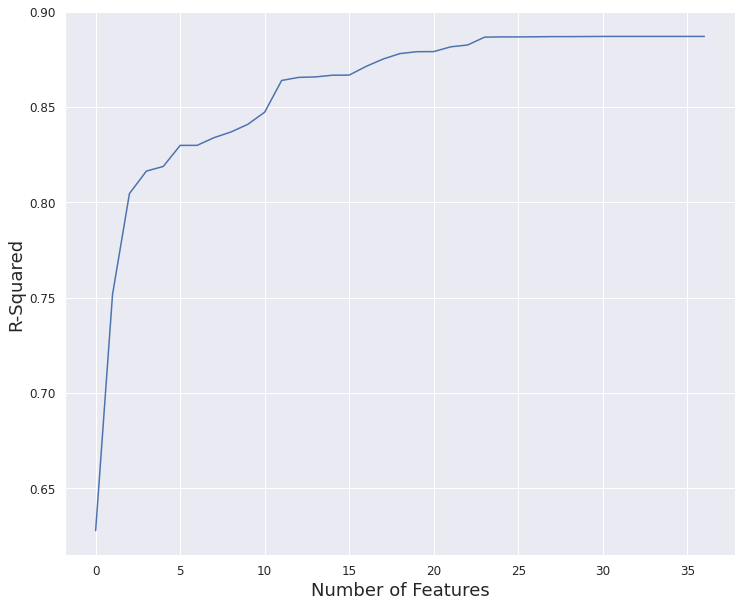

In [ ]:
numLoops = 37
r_squared_array = np.zeros(numLoops)

for idx in range(0,numLoops):
  train_numeric_temp_df = pd.DataFrame(train_numeric[golden_features_list.index[:(idx+1)]].copy())
  #add '1's for y intercept
  train_numeric_temp_df['Ones'] = 1
  model_temp = sm.OLS(outcomes,train_numeric_temp_df).fit()
  r_squared_array[idx] = model_temp.rsquared

#Declare plot size
plt.figure(figsize=(12,10));
#Plot 'r_squared_array'
plt.plot(r_squared_array);
#label the x & y axes
plt.xlabel('Number of Features',fontsize=18);
plt.ylabel('R-Squared',fontsize=18);
#Change font for the ticks 
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

(Above) Visualize the increase in R-Squared as you increase the number of features in the regression. We can see that the R-squared value caps at about ~25 features.



**Visualize the increase in prediction (on the same training data) as you increase the number of features in the regression.**


In [ ]:
#create a function for the percentage of error

def root_mean_squared_percentage_error(y_true, y_predicted):

#root mean squared percentage errror is rmspe
  rmspe = np.sqrt(np.mean(np.square((y_true - y_predicted)/y_true)))*100
  
  return rmspe

Look at the percentage of error for prediction with 1 feature... it's 26.1%

In [ ]:
y_predict_one_feature = model_one_feature.predict(train_numeric_one_feature)
total_percent_error = root_mean_squared_percentage_error(outcomes, y_predict_one_feature)
print(total_percent_error,"%")

26.088533668732804 %


Do the same with two features... it's 22.5%... a lil better

In [ ]:
y_predict_two_features = model_two_features.predict(train_numeric_two_features)
total_percent_error = root_mean_squared_percentage_error(outcomes, y_predict_two_features)
print(total_percent_error,"%")

22.45263019837068 %


**Make a 'for loop' showing the percentage error with each feature added...**

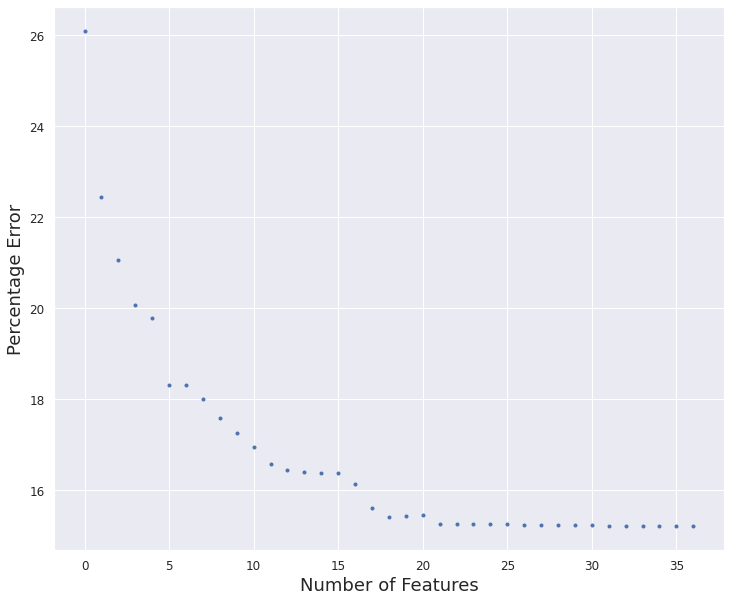

In [ ]:
numLoops = 37
percentage_error_array = np.zeros(numLoops)

for idx in range(0,numLoops):
  train_numeric_temp_df = pd.DataFrame(train_numeric[golden_features_list.index[:(idx+1)]].copy())
  train_numeric_temp_df['Ones'] = 1
  model_temp = sm.OLS(outcomes, train_numeric_temp_df).fit()
  predict_temp = model_temp.predict(train_numeric_temp_df)
  percentage_error_array[idx] = root_mean_squared_percentage_error(outcomes, predict_temp)

plt.figure(figsize=(12,10));
#Plot array, add argument for dots instead of a line
plt.plot(percentage_error_array,'.');
plt.xlabel('Number of Features', fontsize=18);
plt.ylabel('Percentage Error', fontsize=18);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [ ]:
y_predict_two_features[y_predict_two_features>400000]

561     423321.704371
2095    424491.938518
dtype: float64

In [ ]:
train_clean.iloc[670,:]

MS SubClass                      20
MS Zoning                        RL
Lot Frontage                      0
Lot Area                      11875
Street                         Pave
Alley                      No Alley
Lot Shape                       Reg
Land Contour                    Lvl
Utilities                    AllPub
Lot Config                   Inside
Land Slope                      Gtl
Neighborhood                Mitchel
Condition 1                    Norm
Condition 2                    Norm
Bldg Type                      1Fam
House Style                  1Story
Overall Qual                      5
Overall Cond                      5
Year Built                     1999
Year Remod/Add                 1999
Roof Style                    Gable
Roof Matl                   CompShg
Exterior 1st                VinylSd
Exterior 2nd                VinylSd
Mas Vnr Type                   None
Mas Vnr Area                      0
Exter Qual                       TA
Exter Cond                  

##Data Processing

### Cross Validation (Numeric Values)

**Let's see cross validation for the numerical columns from the golden features list.**

In [ ]:
res = 100
percentage_error_mean = np.zeros(36)
for idx in range(0,36):
  print(idx)
  train_numeric_temp_df = pd.DataFrame(train_numeric[golden_features_list.index[:(idx+1)]]).copy()
  train_numeric_temp_df['Ones'] = 1
  percentage_error_array = np.zeros(res)
  for idx2 in range(0, res):
    x_train, x_test, y_train, y_test = model_selection.train_test_split(train_numeric_temp_df,outcomes,test_size=0.1)
    model_temp = sm.OLS(y_train, x_train).fit()
    predict_temp = model_temp.predict(x_test)
    percentage_error_array[idx2] = root_mean_squared_percentage_error(y_test, predict_temp)
  percentage_error_mean[idx] = percentage_error_array.mean()
print(percentage_error_mean)  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
[25.87258879 22.18965895 21.2544914  20.20910217 20.00879133 18.48048898
 18.0782799  17.96037652 17.90075872 17.02186616 16.93401383 16.45915903
 16.28251952 16.48967409 16.54760431 16.63086745 16.25788896 15.93463186
 15.49744457 15.75697525 15.51116981 15.45125421 15.46924035 15.77770553
 15.25222426 15.44447562 15.67562736 15.26507694 15.42660622 15.53709158
 15.35646662 15.11225157 15.22072388 15.37823515 15.48429722 15.01601389]


In [ ]:
print(percentage_error_mean.mean())

16.892934498983273


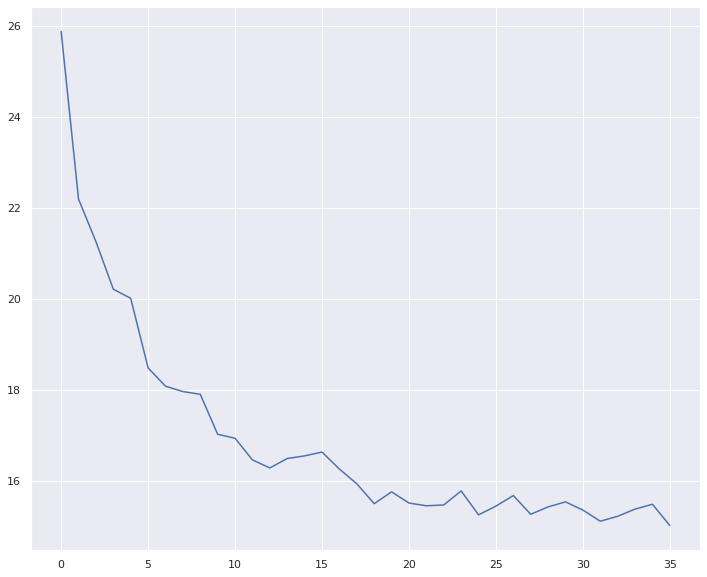

In [ ]:

plt.figure(figsize=(12,10));
plt.plot(percentage_error_mean);


###Scaling (Robust)

In [ ]:
train_numeric_all_features = pd.DataFrame(train_numeric[golden_features_list.index[:36]].copy())


In [ ]:
scaler = preprocessing.RobustScaler()
train_numeric_robust = scaler.fit_transform(train_numeric_all_features)
train_numeric_robust = pd.DataFrame(train_numeric_robust, columns=train_numeric_all_features.columns)

train_numeric_robust['Ones'] = 1

In [ ]:
train_numeric_robust.head()

,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Cars,1st Flr SF,Year Built,Garage Yr Blt,Year Remod/Add,TotRms AbvGrd,Fireplaces,Mas Vnr Area,BsmtFin SF 1,Wood Deck SF,Open Porch SF,Bsmt Full Bath,2nd Flr SF,Lot Area,Bedroom AbvGr,Lot Frontage,Bsmt Unf SF,Enclosed Porch,Kitchen AbvGr,Screen Porch,Overall Cond,Bsmt Half Bath,BsmtFin SF 2,Pool Area,Yr Sold,Low Qual Fin SF,Misc Val,3Ssn Porch,Mo Sold,Ones
0,-1.0,-0.687146,0.076754,0.0,-0.115789,-0.155556,-0.325,-0.729730,-0.5,-1.0,0.0,0.178397,0.000000,-0.363636,1.0,0.000000,1.230673,0.0,0.05,-0.153571,0.0,0.0,0.0,-2.0,0.0,144.0,0.0,-0.5,0.0,0.0,0.0,0.333333,1
1,-1.0,-0.216653,-2.127193,0.0,0.496842,-0.088889,-0.250,-0.648649,0.0,-1.0,0.0,-0.536585,0.000000,-0.363636,0.0,0.000000,0.355860,-1.0,0.30,-0.775000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,500.0,0.0,1.333333,1
2,0.0,-0.088925,-0.416667,-1.0,-0.589474,-0.755556,0.050,-1.108108,0.0,0.0,0.0,-0.536585,0.000000,2.090909,0.0,0.843373,-0.090773,0.0,-0.25,0.617857,0.0,0.0,126.0,1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,2.000000,1
3,1.0,0.675829,0.010965,0.0,-0.178947,0.644444,0.575,0.243243,0.5,0.0,0.0,0.137979,1.666667,2.424242,1.0,1.237420,-0.495012,0.0,0.20,0.101786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.666667,1
4,0.5,-0.476960,-0.899123,0.0,-1.021053,-0.777778,-0.150,0.432432,0.0,-1.0,0.0,-0.048780,1.523810,-0.363636,1.0,0.793763,-0.539651,0.0,0.00,-0.775000,0.0,0.0,0.0,4.0,0.0,210.0,0.0,0.5,0.0,0.0,0.0,-0.666667,1


In [ ]:
model_robust_features = sm.OLS(outcomes,train_numeric_robust).fit()
predictions_robust_features = model_robust_features.predict(train_numeric_robust)
model_robust_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     558.0
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:48:29   Log-Likelihood:                -24837.
No. Observations:                2163   AIC:                         4.974e+04
Df Residuals:                    2132   BIC:                         4.991e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Overall Qual     2.795e+04   1278.673     21.857      0.000    2.54e+04    3.05e+04
Gr Liv Area     -3922.9738   1043.450     -3.760      0.000   -5969.260   -1876.688
Total Bsmt SF    3399.7774    834.659      4.073      0.000    1762.946    5036.609
Garage Cars      5236.4203    998.147      5.246      0.000    3278.976    7193.864
1st Flr SF       3.275e+04    952.503     34.381      0.000    3.09e+04    3.46e+04
Year Built       1.371e+04   1715.794      7.988      0.000    1.03e+04    1.71e+04
Garage Yr Blt    2477.6474   1643.401      1.508      0.132    -745.190    5700.484
Year Remod/Add   5819.2672   1336.065      4.356      0.000    3199.140    8439.395
TotRms AbvGrd    4271.3661   1419.358      3.009      0.003    1487.895    7054.837
Fireplaces       2120.1571    976.202      2.172      0.030     205.750    4034.564
Mas Vnr Area     4384.8648    497.285      8.818      0.000    3409.650    5360.080
BsmtFin SF 1     2.487e+04    743.377     33.456      0.000    2.34e+04    2.63e+04
Wood Deck SF     2310.1697    725.545      3.184      0.001     887.320    3733.019
Open Porch SF     695.3265    591.233      1.176      0.240    -464.128    1854.781
Bsmt Full Bath   3164.2408   1423.226      2.223      0.026     373.185    5955.297
2nd Flr SF       4.592e+04    741.015     61.969      0.000    4.45e+04    4.74e+04
Lot Area         2940.1916    324.508      9.060      0.000    2303.807    3576.576
Bedroom AbvGr   -9448.6761    959.786     -9.845      0.000   -1.13e+04   -7566.461
Lot Frontage     4498.7324    632.598      7.112      0.000    3258.160    5739.305
Bsmt Unf SF      7617.7427    627.082     12.148      0.000    6387.986    8847.499
Enclosed Porch     18.2262      9.122      1.998      0.046       0.337      36.116
Kitchen AbvGr   -1.736e+04   2914.945     -5.957      0.000   -2.31e+04   -1.16e+04
Screen Porch       35.2195      9.381      3.754      0.000      16.822      53.617
Overall Cond     5013.2633    560.549      8.943      0.000    3913.983    6112.544
Bsmt Half Bath  -3627.2026   2284.882     -1.587      0.113   -8108.033     853.628
BsmtFin SF 2       23.7602      2.948      8.059      0.000      17.979      29.542
Pool Area         -20.7948     17.612     -1.181      0.238     -55.334      13.744
Yr Sold         -1068.1869    801.076     -1.333      0.183   -2639.159     502.785
Low Qual Fin SF    38.1352     11.711      3.256      0.001      15.170      61.101
Misc Val           -1.1629      1.209     -0.962      0.336      -3.535       1.209
3Ssn Porch        -20.5237     22.811     -0.900      0.368     -65.257      24.210
Mo Sold          -282.0588    590.741     -0.477      0.633   -1440.548     876.430
Ones             1.362e+05   1239.427    109.856      0.000    1.34e+05    1.39e+05
===========================================================

In [ ]:
type(train_numeric_robust)

pandas.core.frame.DataFrame

In [ ]:
train_numeric_robust

,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Cars,1st Flr SF,Year Built,Garage Yr Blt,Year Remod/Add,TotRms AbvGrd,Fireplaces,Mas Vnr Area,BsmtFin SF 1,Wood Deck SF,Open Porch SF,Bsmt Full Bath,2nd Flr SF,Lot Area,Bedroom AbvGr,Lot Frontage,Bsmt Unf SF,Enclosed Porch,Kitchen AbvGr,Screen Porch,Overall Cond,Bsmt Half Bath,BsmtFin SF 2,Pool Area,Yr Sold,Low Qual Fin SF,Misc Val,3Ssn Porch,Mo Sold,Ones
0,-1.0,-0.687146,0.076754,0.0,-0.115789,-0.155556,-0.325,-0.729730,-0.5,-1.0,0.000000,0.178397,0.000000,-0.363636,1.0,0.000000,1.230673,0.0,0.050,-0.153571,0.0,0.0,0.0,-2.0,0.0,144.0,0.0,-0.5,0.0,0.0,0.0,0.333333,1
1,-1.0,-0.216653,-2.127193,0.0,0.496842,-0.088889,-0.250,-0.648649,0.0,-1.0,0.000000,-0.536585,0.000000,-0.363636,0.0,0.000000,0.355860,-1.0,0.300,-0.775000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,500.0,0.0,1.333333,1
2,0.0,-0.088925,-0.416667,-1.0,-0.589474,-0.755556,0.050,-1.108108,0.0,0.0,0.000000,-0.536585,0.000000,2.090909,0.0,0.843373,-0.090773,0.0,-0.250,0.617857,0.0,0.0,126.0,1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,2.000000,1
3,1.0,0.675829,0.010965,0.0,-0.178947,0.644444,0.575,0.243243,0.5,0.0,0.000000,0.137979,1.666667,2.424242,1.0,1.237420,-0.495012,0.0,0.200,0.101786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.666667,1
4,0.5,-0.476960,-0.899123,0.0,-1.021053,-0.777778,-0.150,0.432432,0.0,-1.0,0.000000,-0.048780,1.523810,-0.363636,1.0,0.793763,-0.539651,0.0,0.000,-0.775000,0.0,0.0,0.0,4.0,0.0,210.0,0.0,0.5,0.0,0.0,0.0,-0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0.0,-0.410671,-0.337719,0.0,-0.513684,-0.822222,0.200,-1.108108,0.0,0.0,0.000000,-0.536585,0.666667,-0.363636,0.0,0.000000,-0.779052,0.0,-0.200,0.682143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,360.0,400.0,0.0,1.000000,1
2159,0.5,-0.596605,0.184211,0.0,0.002105,0.422222,0.325,0.000000,-1.0,-1.0,0.000000,0.104530,0.678571,0.181818,1.0,0.000000,0.352618,-2.0,0.350,-0.225000,0.0,0.0,0.0,1.0,0.0,286.0,0.0,0.5,0.0,0.0,0.0,0.333333,1
2160,1.0,-0.329830,0.561404,0.0,0.349474,0.222222,0.100,-0.270270,-1.0,1.0,0.000000,0.801394,0.791667,0.818182,1.0,0.000000,-1.392020,-2.0,0.025,-0.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.000000,1
2161,0.0,-0.129345,0.206140,0.0,0.610526,0.066667,-0.075,-0.459459,0.5,0.0,1.171717,-0.536585,0.000000,-0.363636,0.0,0.000000,0.193516,0.0,0.450,1.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.666667,1


In [ ]:
type(model_robust_features)

statsmodels.regression.linear_model.RegressionResultsWrapper

###One-Hot Encoding

An example with one feature one-hot encoded

In [ ]:
train_neighborhood = pd.DataFrame(train_clean['Neighborhood'].copy())
train_one_hot = pd.get_dummies(train_neighborhood['Neighborhood'])
train_one_hot

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2160,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_numeric_one_hot = pd.concat([train_numeric, train_one_hot], axis=1)
train_numeric_one_hot.drop(['SalePrice'], axis=1, inplace=True)

In [ ]:
train_numeric_one_hot['Ones'] = 1
model_one_hot = sm.OLS(outcomes, train_numeric_one_hot).fit()
predict_one_hot = model_one_hot.predict(train_numeric_one_hot)
percentage_error = root_mean_squared_percentage_error(outcomes, predict_one_hot)
percentage_error

13.280333015979922

###Making a list of all the non-numeric features

In [ ]:
train_non_numeric = train_clean.select_dtypes(include=['object'])

In [ ]:
train_non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2163 non-null   object
 1   MS Zoning       2163 non-null   object
 2   Street          2163 non-null   object
 3   Alley           2163 non-null   object
 4   Lot Shape       2163 non-null   object
 5   Land Contour    2163 non-null   object
 6   Utilities       2163 non-null   object
 7   Lot Config      2163 non-null   object
 8   Land Slope      2163 non-null   object
 9   Neighborhood    2163 non-null   object
 10  Condition 1     2163 non-null   object
 11  Condition 2     2163 non-null   object
 12  Bldg Type       2163 non-null   object
 13  House Style     2163 non-null   object
 14  Roof Style      2163 non-null   object
 15  Roof Matl       2163 non-null   object
 16  Exterior 1st    2163 non-null   object
 17  Exterior 2nd    2163 non-null   object
 18  Mas Vnr 

In [ ]:
train_non_numeric

,MS SubClass,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Full Bath,Half Bath,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,20,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,1,0,TA,Typ,No Fireplace,Detchd,Unf,TA,TA,N,No Pool,MnPrv,No Misc Features,WD,Normal
1,90,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,Slab,No Basement,No Basement,No Basement,No Basement,No Basement,GasA,TA,Y,SBrkr,2,0,TA,Typ,No Fireplace,CarPort,Unf,TA,TA,Y,No Pool,No Fence,Shed,WD,Normal
2,50,RM,Pave,No Alley,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,Gd,PConc,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,1,1,Gd,Typ,Gd,Detchd,Unf,TA,TA,P,No Pool,No Fence,No Misc Features,WD,Normal
3,60,FV,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,2,1,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No Misc Features,WD,Normal
4,70,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,Gd,Gd,No,ALQ,BLQ,GasA,Ex,Y,SBrkr,1,0,Gd,Typ,No Fireplace,Detchd,RFn,TA,TA,Y,No Pool,MnPrv,No Misc Features,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,50,RM,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,1,0,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,MnPrv,Shed,WD,Normal
2159,80,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,GLQ,ALQ,GasA,Gd,Y,SBrkr,1,1,Gd,Typ,No Fireplace,Attchd,Unf,TA,TA,Y,No Pool,No Fence,No Misc Features,WD,Normal
2160,120,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Greens,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Wd Sdng,Plywood,None,Gd,TA,CBlock,Gd,TA,Gd,GLQ,Unf,GasA,TA,Y,SBrkr,1,0,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,No Pool,No Fence,No Misc Features,WD,Normal
2161,20,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,2,0,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,MnPrv,No Misc Features,WD,Normal


One hot encoding all non-numeric features

In [ ]:
train_objects = pd.DataFrame(train_non_numeric.copy())
train_one_hot_all = pd.get_dummies(train_objects)
train_one_hot_all['SalePrice'] = train_clean['SalePrice']
train_one_hot_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Columns: 290 entries, MS SubClass_120 to SalePrice
dtypes: int64(1), uint8(289)
memory usage: 627.5 KB


Adding those features to our select numeric features

In [ ]:
train_numeric_one_hot_all = pd.concat([train_numeric_robust, train_one_hot_all], axis=1)
train_numeric_one_hot_all.drop(['SalePrice'], axis=1, inplace=True)


In [ ]:
train_numeric_one_hot_all['Ones'] = 1
model_one_hot_all = sm.OLS(outcomes, train_numeric_one_hot_all).fit()
predict_one_hot_all = model_one_hot_all.predict(train_numeric_one_hot_all)
percentage_error_total_one_hot = root_mean_squared_percentage_error(outcomes, predict_one_hot_all)
percentage_error_total_one_hot

9.032070127179475

###Nonlinear Fitting

Determine the best power to use for nonlinear fitting (outcomes) with cross-validation

In [ ]:
# Look for 'powNum' that gives us the optimal (lowest) percentage error.

intArray      = 1/np.arange(1,11,1)
print(intArray)
numInnerLoops = 100

# Pre-allocate outer loop result array
percentage_error_mean = np.zeros(len(intArray))

for outerIdx, powNum in enumerate(intArray): 
  print('idx = ',outerIdx)
  
  # Create dataframe for prediction
  #train_nonlinear = train_numeric_one_hot_all.drop(['SalePrice'], axis=1).copy()
  #train_nonlinear['Ones'] = 1

  # Pre-allocate inner result array
  percentage_error = np.zeros(numInnerLoops)
  
  # Cross validation loop
  for innerIdx in range(0,numInnerLoops):
    # Cross validation process: Split data, train model, predict from model, check accuracy
    X_train, X_test, y_train, y_test = model_selection.train_test_split(train_numeric_one_hot_all, outcomes, test_size=0.2)
    # For training use X_train, y_train
    y_train_with_power = y_train.pow(powNum) # Set training outcome to a power (powNum) of the 'SalePrice'
    model_loop_temp = sm.OLS(y_train_with_power, X_train).fit()
    # For prediction use X_test (didn't train on it)
    predict_loop_temp = model_loop_temp.predict(X_test)
    final_predict_loop_temp = predict_loop_temp.pow(1/powNum) # Set final prediction outcome to the power (1/powNum)
    # Check accuracy of predict_loop_temp versus y_test (real outcomes)
    percentage_error[innerIdx] = root_mean_squared_percentage_error(y_test, final_predict_loop_temp)

  percentage_error_mean[outerIdx] = percentage_error.mean()

[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1       ]
idx =  0
idx =  1
idx =  2
idx =  3
idx =  4
idx =  5
idx =  6
idx =  7
idx =  8
idx =  9


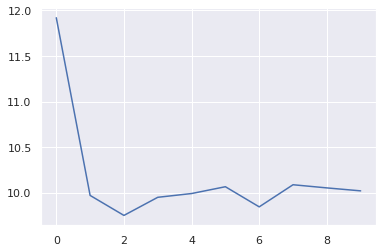

In [ ]:
plt.plot(percentage_error_mean);

Above shows us that best power number is 1/3

In [ ]:
percentage_error_mean.mean()

10.165088284074152

###Ridge Regression

In [ ]:
model_one_hot = sm.OLS(outcomes, train_numeric_one_hot_all).fit()
predict_one_hot = model_one_hot.predict(train_numeric_one_hot_all)
percentage_error_one_hot = root_mean_squared_percentage_error(outcomes,predict_one_hot)
percentage_error_one_hot

9.032070127179475

idx =  0
idx =  1
idx =  2
idx =  3
idx =  4
idx =  5
idx =  6
[11.41438828 11.34231913 11.14577984 10.89167412 10.62045807 10.92868437
 12.63506895]
11.282624679372622


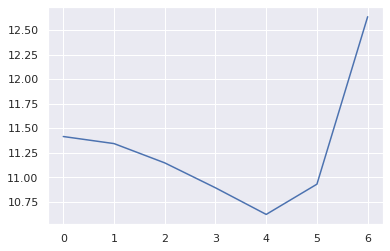

In [ ]:
alpha_value = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]

percentage_error_ridge = np.zeros(len(alpha_value))
numLoops = 250

for idx, alpha_val in enumerate(alpha_value):
  print('idx = ',idx)
  percentage_error_temp = np.zeros(numLoops)
  ridgereg = Ridge(alpha=alpha_val, normalize=False)
  
  for innerIdx in range(0,numLoops):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(train_numeric_one_hot_all, outcomes, test_size=0.1)
    ridgereg.fit(X_train, y_train)
    y_pred = ridgereg.predict(X_test)
    percentage_error_temp[innerIdx] = root_mean_squared_percentage_error(y_test, y_pred)

  percentage_error_ridge[idx] = percentage_error_temp.mean()

plt.plot(percentage_error_ridge);
print(percentage_error_ridge)
print(percentage_error_ridge.mean())

In [ ]:
percentage_error_ridge.mean()

11.282624679372622

Above shows best alpha value is 10 

In [ ]:
alpha_value = [10]
best_powNum = 1/3
percentage_error_ridge = np.zeros(len(alpha_value))
numLoops = 1000

for idx, alpha_val in enumerate(alpha_value):
  print('idx = ',idx)
  percentage_error_temp = np.zeros(numLoops)
  ridgereg = Ridge(alpha=alpha_val, normalize=False)
  
  for innerIdx in range(0,numLoops):

    X_train, X_test, y_train, y_test = model_selection.train_test_split(train_numeric_one_hot_all, outcomes, test_size=0.1)
    ridgereg.fit(X_train, y_train.pow(best_powNum))
    y_pred = ridgereg.predict(X_test)
    full_y_pred = np.power(y_pred, 1/best_powNum)
    percentage_error_temp[innerIdx] = root_mean_squared_percentage_error(y_test, full_y_pred)

  percentage_error_ridge[idx] = percentage_error_temp.mean()

# plt.plot(percentage_error_ridge);
print(percentage_error_ridge)
print(percentage_error_ridge.mean())

idx =  0
[9.24729477]
9.247294765011254


In [ ]:
train_numeric_one_hot_all

,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Cars,1st Flr SF,Year Built,Garage Yr Blt,Year Remod/Add,TotRms AbvGrd,Fireplaces,Mas Vnr Area,BsmtFin SF 1,Wood Deck SF,Open Porch SF,Bsmt Full Bath,2nd Flr SF,Lot Area,Bedroom AbvGr,Lot Frontage,Bsmt Unf SF,Enclosed Porch,Kitchen AbvGr,Screen Porch,Overall Cond,Bsmt Half Bath,BsmtFin SF 2,Pool Area,Yr Sold,Low Qual Fin SF,Misc Val,3Ssn Porch,Mo Sold,Ones,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,...,Electrical_SBrkr,Full Bath_0,Full Bath_1,Full Bath_2,Full Bath_3,Full Bath_4,Half Bath_0,Half Bath_1,Half Bath_2,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_No Fireplace,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Garage Finish_Fin,Garage Finish_No Garage,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_No Garage,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_No Garage,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_No Pool,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,Misc Feature_Gar2,Misc Feature_No Misc Features,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Normal
0,-1.0,-0.687146,0.076754,0.0,-0.115789,-0.155556,-0.325,-0.729730,-0.5,-1.0,0.000000,0.178397,0.000000,-0.363636,1.0,0.000000,1.230673,0.0,0.050,-0.153571,0.0,0.0,0.0,-2.0,0.0,144.0,0.0,-0.5,0.0,0.0,0.0,0.333333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,-1.0,-0.216653,-2.127193,0.0,0.496842,-0.088889,-0.250,-0.648649,0.0,-1.0,0.000000,-0.536585,0.000000,-0.363636,0.0,0.000000,0.355860,-1.0,0.300,-0.775000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,500.0,0.0,1.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2,0.0,-0.088925,-0.416667,-1.0,-0.589474,-0.755556,0.050,-1.108108,0.0,0.0,0.000000,-0.536585,0.000000,2.090909,0.0,0.843373,-0.090773,0.0,-0.250,0.617857,0.0,0.0,126.0,1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,2.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,1.0,0.675829,0.010965,0.0,-0.178947,0.644444,0.575,0.243243,0.5,0.0,0.000000,0.137979,1.666667,2.424242,1.0,1.237420,-0.495012,0.0,0.200,0.101786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.666667,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0

###Final Model

In [ ]:
# Set our optimized variables.
best_powNum = 1/3
best_alpha = 10

# Save final outcomes
outcomes_final = train_numeric['SalePrice'].copy()

# Save final numeric features
train_numeric_final = train_numeric.drop(['SalePrice'], axis=1).copy()


Produce final model using ridge regression.

In [ ]:
model_final_ridge = Ridge(alpha=best_alpha, normalize=False)
model_final_ridge.fit(train_numeric_one_hot_all, outcomes_final.pow(best_powNum))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
train_numeric_one_hot_all.shape


(2163, 322)

###Process the blind test data.

Load blind test data.

Examine blind test data.

In [ ]:
test_data.shape

(246, 79)

Insure there are no NaNs.

In [ ]:
test_data.isna().sum().sum()

0

Change 'MS Subclass' from int64 to str.

In [ ]:
test_data['MS SubClass'] = test_data['MS SubClass'].apply(str)

In [ ]:
test_data['Full Bath'] = test_data['Full Bath'].apply(str)

In [ ]:
test_data['Half Bath'] = test_data['Half Bath'].apply(str)

Make a dataframe of the numerical features used to train the final model.

In [ ]:
test_data_numeric = test_data[train_numeric_final.columns]

###Scaling the test data (Robust)

In [ ]:
test_numeric_all_features = pd.DataFrame(test_data_numeric[golden_features_list.index[:36]].copy())


In [ ]:
scaler = preprocessing.RobustScaler()
test_numeric_robust = scaler.fit_transform(test_numeric_all_features)
test_numeric_robust = pd.DataFrame(test_numeric_robust, columns=test_numeric_all_features.columns)

test_numeric_robust['Ones'] = 1

In [ ]:
test_numeric_robust.head()

,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Cars,1st Flr SF,Year Built,Garage Yr Blt,Year Remod/Add,TotRms AbvGrd,Fireplaces,Mas Vnr Area,BsmtFin SF 1,Wood Deck SF,Open Porch SF,Bsmt Full Bath,2nd Flr SF,Lot Area,Bedroom AbvGr,Lot Frontage,Bsmt Unf SF,Enclosed Porch,Kitchen AbvGr,Screen Porch,Overall Cond,Bsmt Half Bath,BsmtFin SF 2,Pool Area,Yr Sold,Low Qual Fin SF,Misc Val,3Ssn Porch,Mo Sold,Ones
0,0.0,0.072645,0.942921,0.0,0.829971,-0.041026,-0.202381,-0.629371,0.5,0.0,0.0,-0.513316,0.0,-0.295302,0.0,0.000000,-0.010473,0.0,-1.787234,1.717745,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.666667,1
1,-0.5,-0.175558,-0.998652,0.0,0.514890,-0.451282,0.464286,0.405594,0.0,0.0,0.0,-0.113848,0.0,0.268456,0.0,0.000000,2.105482,0.0,-1.787234,-0.587056,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.333333,1
2,0.0,0.006054,-0.518652,0.0,-0.434198,-1.435897,-0.464286,0.069930,0.0,-1.0,0.0,-0.513316,0.0,0.496644,0.0,0.893741,1.271213,0.0,0.539007,0.359916,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.000000,1
3,0.5,0.092319,-0.338876,-1.0,-0.395773,-0.800000,-1.083333,0.265734,0.0,0.0,0.0,-0.513316,0.0,-0.295302,0.0,0.947598,-0.504069,0.0,-0.085106,0.526931,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,1
4,0.0,-0.057510,0.748764,0.0,0.664745,0.615385,0.559524,0.265734,-0.5,-1.0,0.0,0.999334,0.0,2.026846,1.0,0.000000,-0.277459,-1.0,-1.787234,-0.553653,0.0,0.0,0.0,0.0,0.0,116.0,0.0,-1.0,0.0,0.0,0.0,1.333333,1


In [ ]:
type(test_numeric_robust)

pandas.core.frame.DataFrame

In [ ]:
test_numeric_robust.head()

,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Cars,1st Flr SF,Year Built,Garage Yr Blt,Year Remod/Add,TotRms AbvGrd,Fireplaces,Mas Vnr Area,BsmtFin SF 1,Wood Deck SF,Open Porch SF,Bsmt Full Bath,2nd Flr SF,Lot Area,Bedroom AbvGr,Lot Frontage,Bsmt Unf SF,Enclosed Porch,Kitchen AbvGr,Screen Porch,Overall Cond,Bsmt Half Bath,BsmtFin SF 2,Pool Area,Yr Sold,Low Qual Fin SF,Misc Val,3Ssn Porch,Mo Sold,Ones
0,0.0,0.072645,0.942921,0.0,0.829971,-0.041026,-0.202381,-0.629371,0.5,0.0,0.0,-0.513316,0.0,-0.295302,0.0,0.000000,-0.010473,0.0,-1.787234,1.717745,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.666667,1
1,-0.5,-0.175558,-0.998652,0.0,0.514890,-0.451282,0.464286,0.405594,0.0,0.0,0.0,-0.113848,0.0,0.268456,0.0,0.000000,2.105482,0.0,-1.787234,-0.587056,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.333333,1
2,0.0,0.006054,-0.518652,0.0,-0.434198,-1.435897,-0.464286,0.069930,0.0,-1.0,0.0,-0.513316,0.0,0.496644,0.0,0.893741,1.271213,0.0,0.539007,0.359916,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.000000,1
3,0.5,0.092319,-0.338876,-1.0,-0.395773,-0.800000,-1.083333,0.265734,0.0,0.0,0.0,-0.513316,0.0,-0.295302,0.0,0.947598,-0.504069,0.0,-0.085106,0.526931,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,1
4,0.0,-0.057510,0.748764,0.0,0.664745,0.615385,0.559524,0.265734,-0.5,-1.0,0.0,0.999334,0.0,2.026846,1.0,0.000000,-0.277459,-1.0,-1.787234,-0.553653,0.0,0.0,0.0,0.0,0.0,116.0,0.0,-1.0,0.0,0.0,0.0,1.333333,1


###One-Hot the Test Data

Make a dataframe of the categorical features (before one hot encoding) used to train the final model.

In [ ]:
test_data_category = test_data[train_non_numeric.columns]

One hot encode the test_data categories used to train the final model.

In [ ]:
test_category_one_hot = pd.get_dummies(test_data_category)
test_data_one_hot = pd.concat([test_numeric_robust, test_category_one_hot], axis=1)
test_data_one_hot['Ones'] = 1
test_data_one_hot.shape

(246, 268)

###Create DataFrame with Correct Size

Get the number of rows (data instances) in the test_data.

In [ ]:
numRows = test_data_one_hot.shape[0]
numRows

246

Creat a dataframe of all zeros with the size of: Number of rows equal to the number of data instances in the test_data; and Columns equal to the features used to train the final model. You will get an error if the sizes are not the same.

In [ ]:
test_data_full = pd.DataFrame(0, index=np.arange(numRows), columns=train_numeric_one_hot_all.columns)

Need to find the intersection of the features used to train the model (train_numeric_one_hot_all) and the features in the test_data set (test_data_one_hot). 

In [ ]:
column_intersection = test_data_one_hot.columns.intersection(train_numeric_one_hot_all.columns)

###Populate DataFrame with Intersection Values

Populate the dataframe of zeros with intersection features from above code block.

In [ ]:
test_data_full[column_intersection] = test_data_one_hot[column_intersection]

In [ ]:
test_data_full.head()

,Overall Qual,Gr Liv Area,Total Bsmt SF,Garage Cars,1st Flr SF,Year Built,Garage Yr Blt,Year Remod/Add,TotRms AbvGrd,Fireplaces,Mas Vnr Area,BsmtFin SF 1,Wood Deck SF,Open Porch SF,Bsmt Full Bath,2nd Flr SF,Lot Area,Bedroom AbvGr,Lot Frontage,Bsmt Unf SF,Enclosed Porch,Kitchen AbvGr,Screen Porch,Overall Cond,Bsmt Half Bath,BsmtFin SF 2,Pool Area,Yr Sold,Low Qual Fin SF,Misc Val,3Ssn Porch,Mo Sold,Ones,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,...,Electrical_SBrkr,Full Bath_0,Full Bath_1,Full Bath_2,Full Bath_3,Full Bath_4,Half Bath_0,Half Bath_1,Half Bath_2,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplace Qu_Ex,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_No Fireplace,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_No Garage,Garage Finish_Fin,Garage Finish_No Garage,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_No Garage,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_No Garage,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_No Pool,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,Misc Feature_Gar2,Misc Feature_No Misc Features,Misc Feature_Othr,Misc Feature_Shed,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Normal
0,0.0,0.072645,0.942921,0.0,0.829971,-0.041026,-0.202381,-0.629371,0.5,0.0,0.0,-0.513316,0.0,-0.295302,0.0,0.000000,-0.010473,0.0,-1.787234,1.717745,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.666667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,-0.5,-0.175558,-0.998652,0.0,0.514890,-0.451282,0.464286,0.405594,0.0,0.0,0.0,-0.113848,0.0,0.268456,0.0,0.000000,2.105482,0.0,-1.787234,-0.587056,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.333333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
2,0.0,0.006054,-0.518652,0.0,-0.434198,-1.435897,-0.464286,0.069930,0.0,-1.0,0.0,-0.513316,0.0,0.496644,0.0,0.893741,1.271213,0.0,0.539007,0.359916,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,0.5,0.092319,-0.338876,-1.0,-0.395773,-0.800000,-1.083333,0.265734,0.0,0.0,0.0,-0.513316,0.0,-0.295302,0.0,0.947598,-0.504069,0.0,-0.085106,0.526931,112.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,

###Final Prediction

Predict using ridge regression.

In [ ]:
test_predict_final_ridge = model_final_ridge.predict(test_data_full)
full_test_predict_final_ridge = np.power(test_predict_final_ridge, 1/best_powNum)

In [ ]:
full_test_predict_final_ridge_result = pd.DataFrame(full_test_predict_final_ridge,columns=['Result'])

In [ ]:
full_test_predict_final_ridge_result.to_csv('/content/drive/My Drive/Colab Notebooks/csv files/Blind_Test_Predictions.csv', index=False)

In [ ]:
temp = pd.read_csv('/content/drive/My Drive/Colab Notebooks/csv files/Blind_Test_Predictions.csv')

In [ ]:
temp.head()

,Result
0,178733.795570
1,142947.205245
2,143988.270748
3,167308.427936
4,185221.901603


##Conclusion

- We can increase the prediction accuracy by using numerical values highly correlated to sales price.
- Scaling the numerical values can help by giving us more useful coefficients.
-Nonlinear fitting can decrease error percentage by dealing with outliers that don't fit the linear model.
-We can improve the model even more by breaking out string type values into additional features with one-hot encoding.
-Too many features can lead to over-fitting the model, which decreases it's predictive power but...
-We can address over-fitting issues with another nonlinear regression technique, for example ridge regression.
